<a href="https://colab.research.google.com/github/dforsberg1/ML_Intro/blob/main/Machine_Learning_Workshop_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research & Data Services

https://research.library.gsu.edu/dataservices

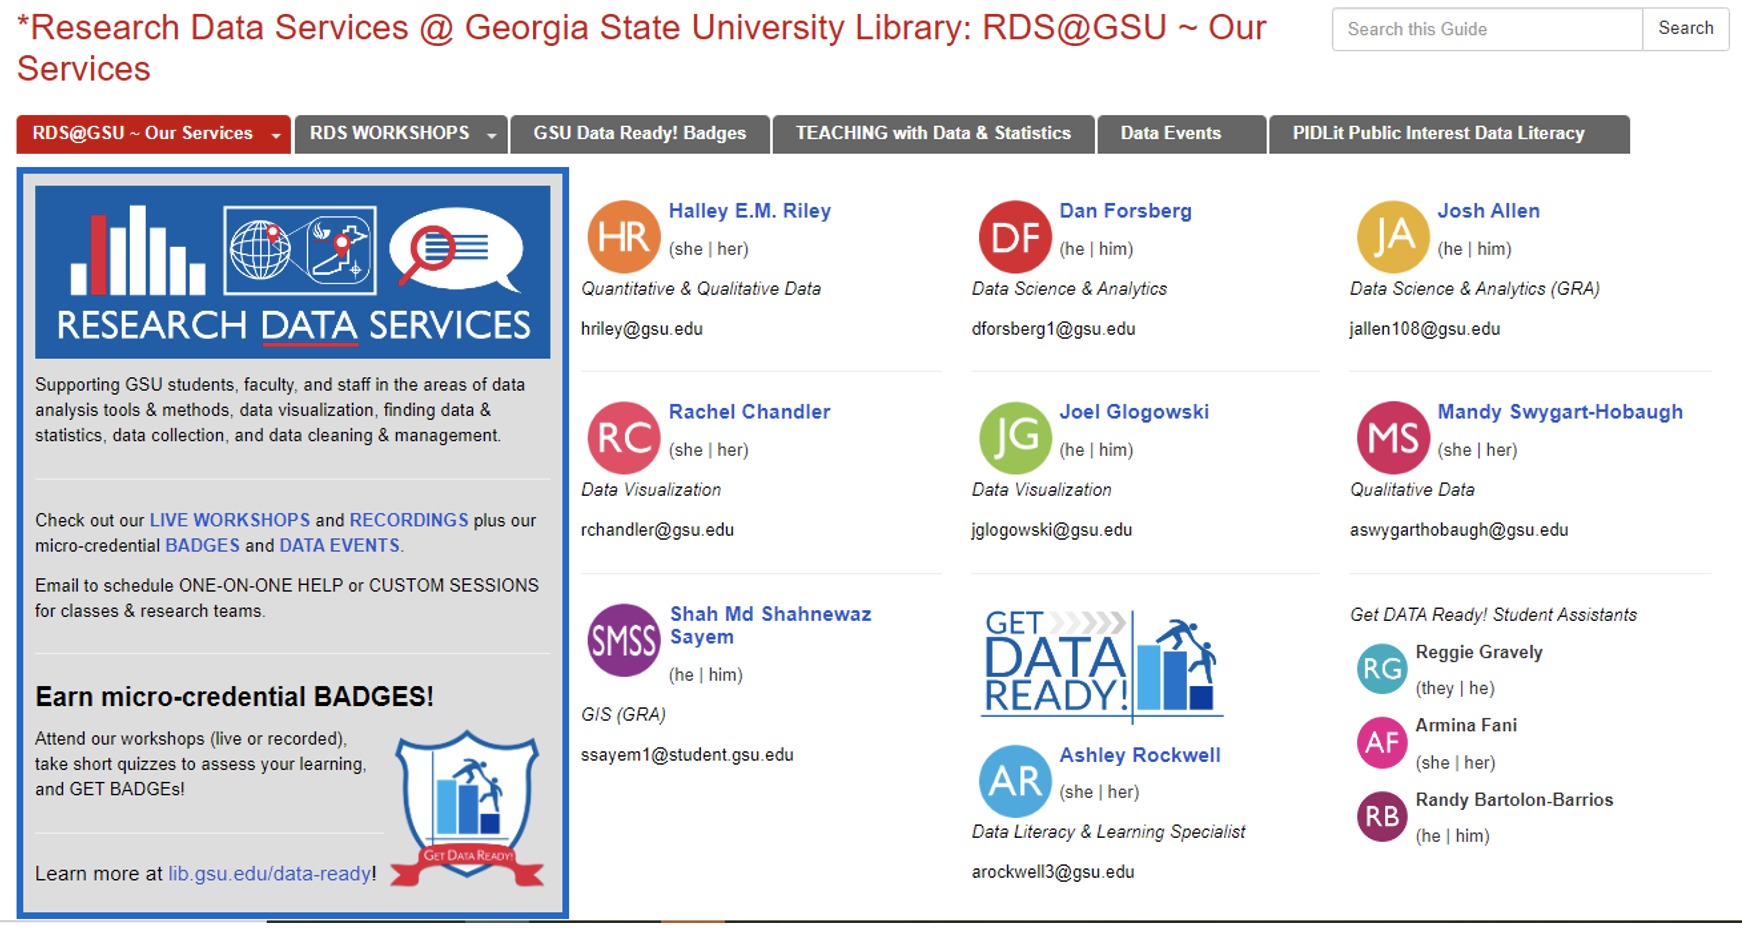

# RDS workshops:
https://research.library.gsu.edu/dataservices/rds-workshops

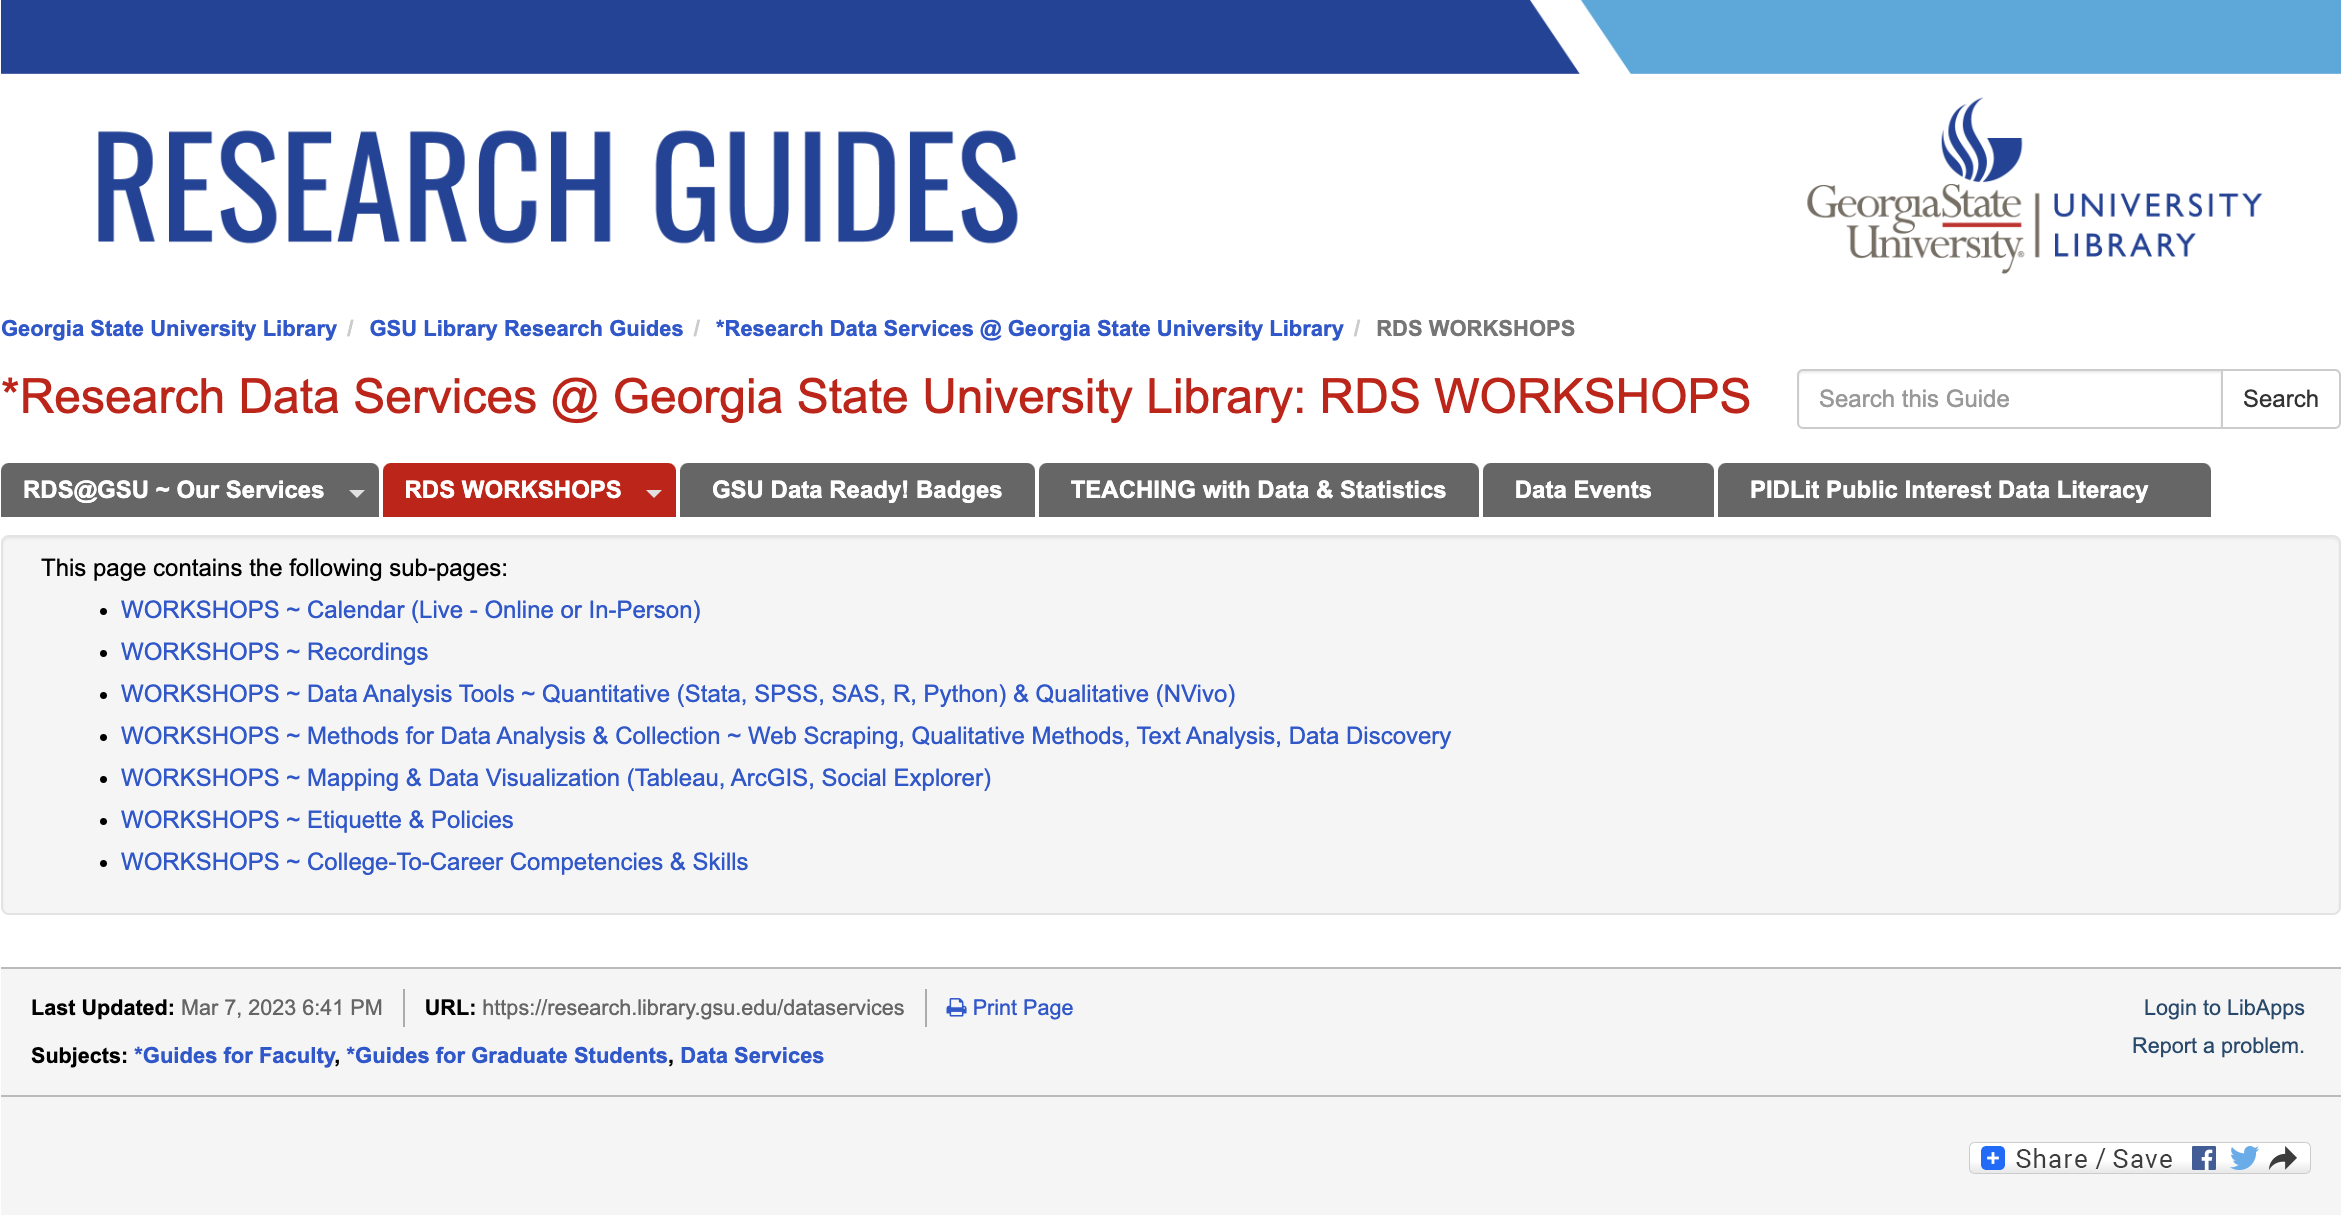

# Recorded RDS Workshops

https://research.library.gsu.edu/dataservices/rds-workshops-recordings

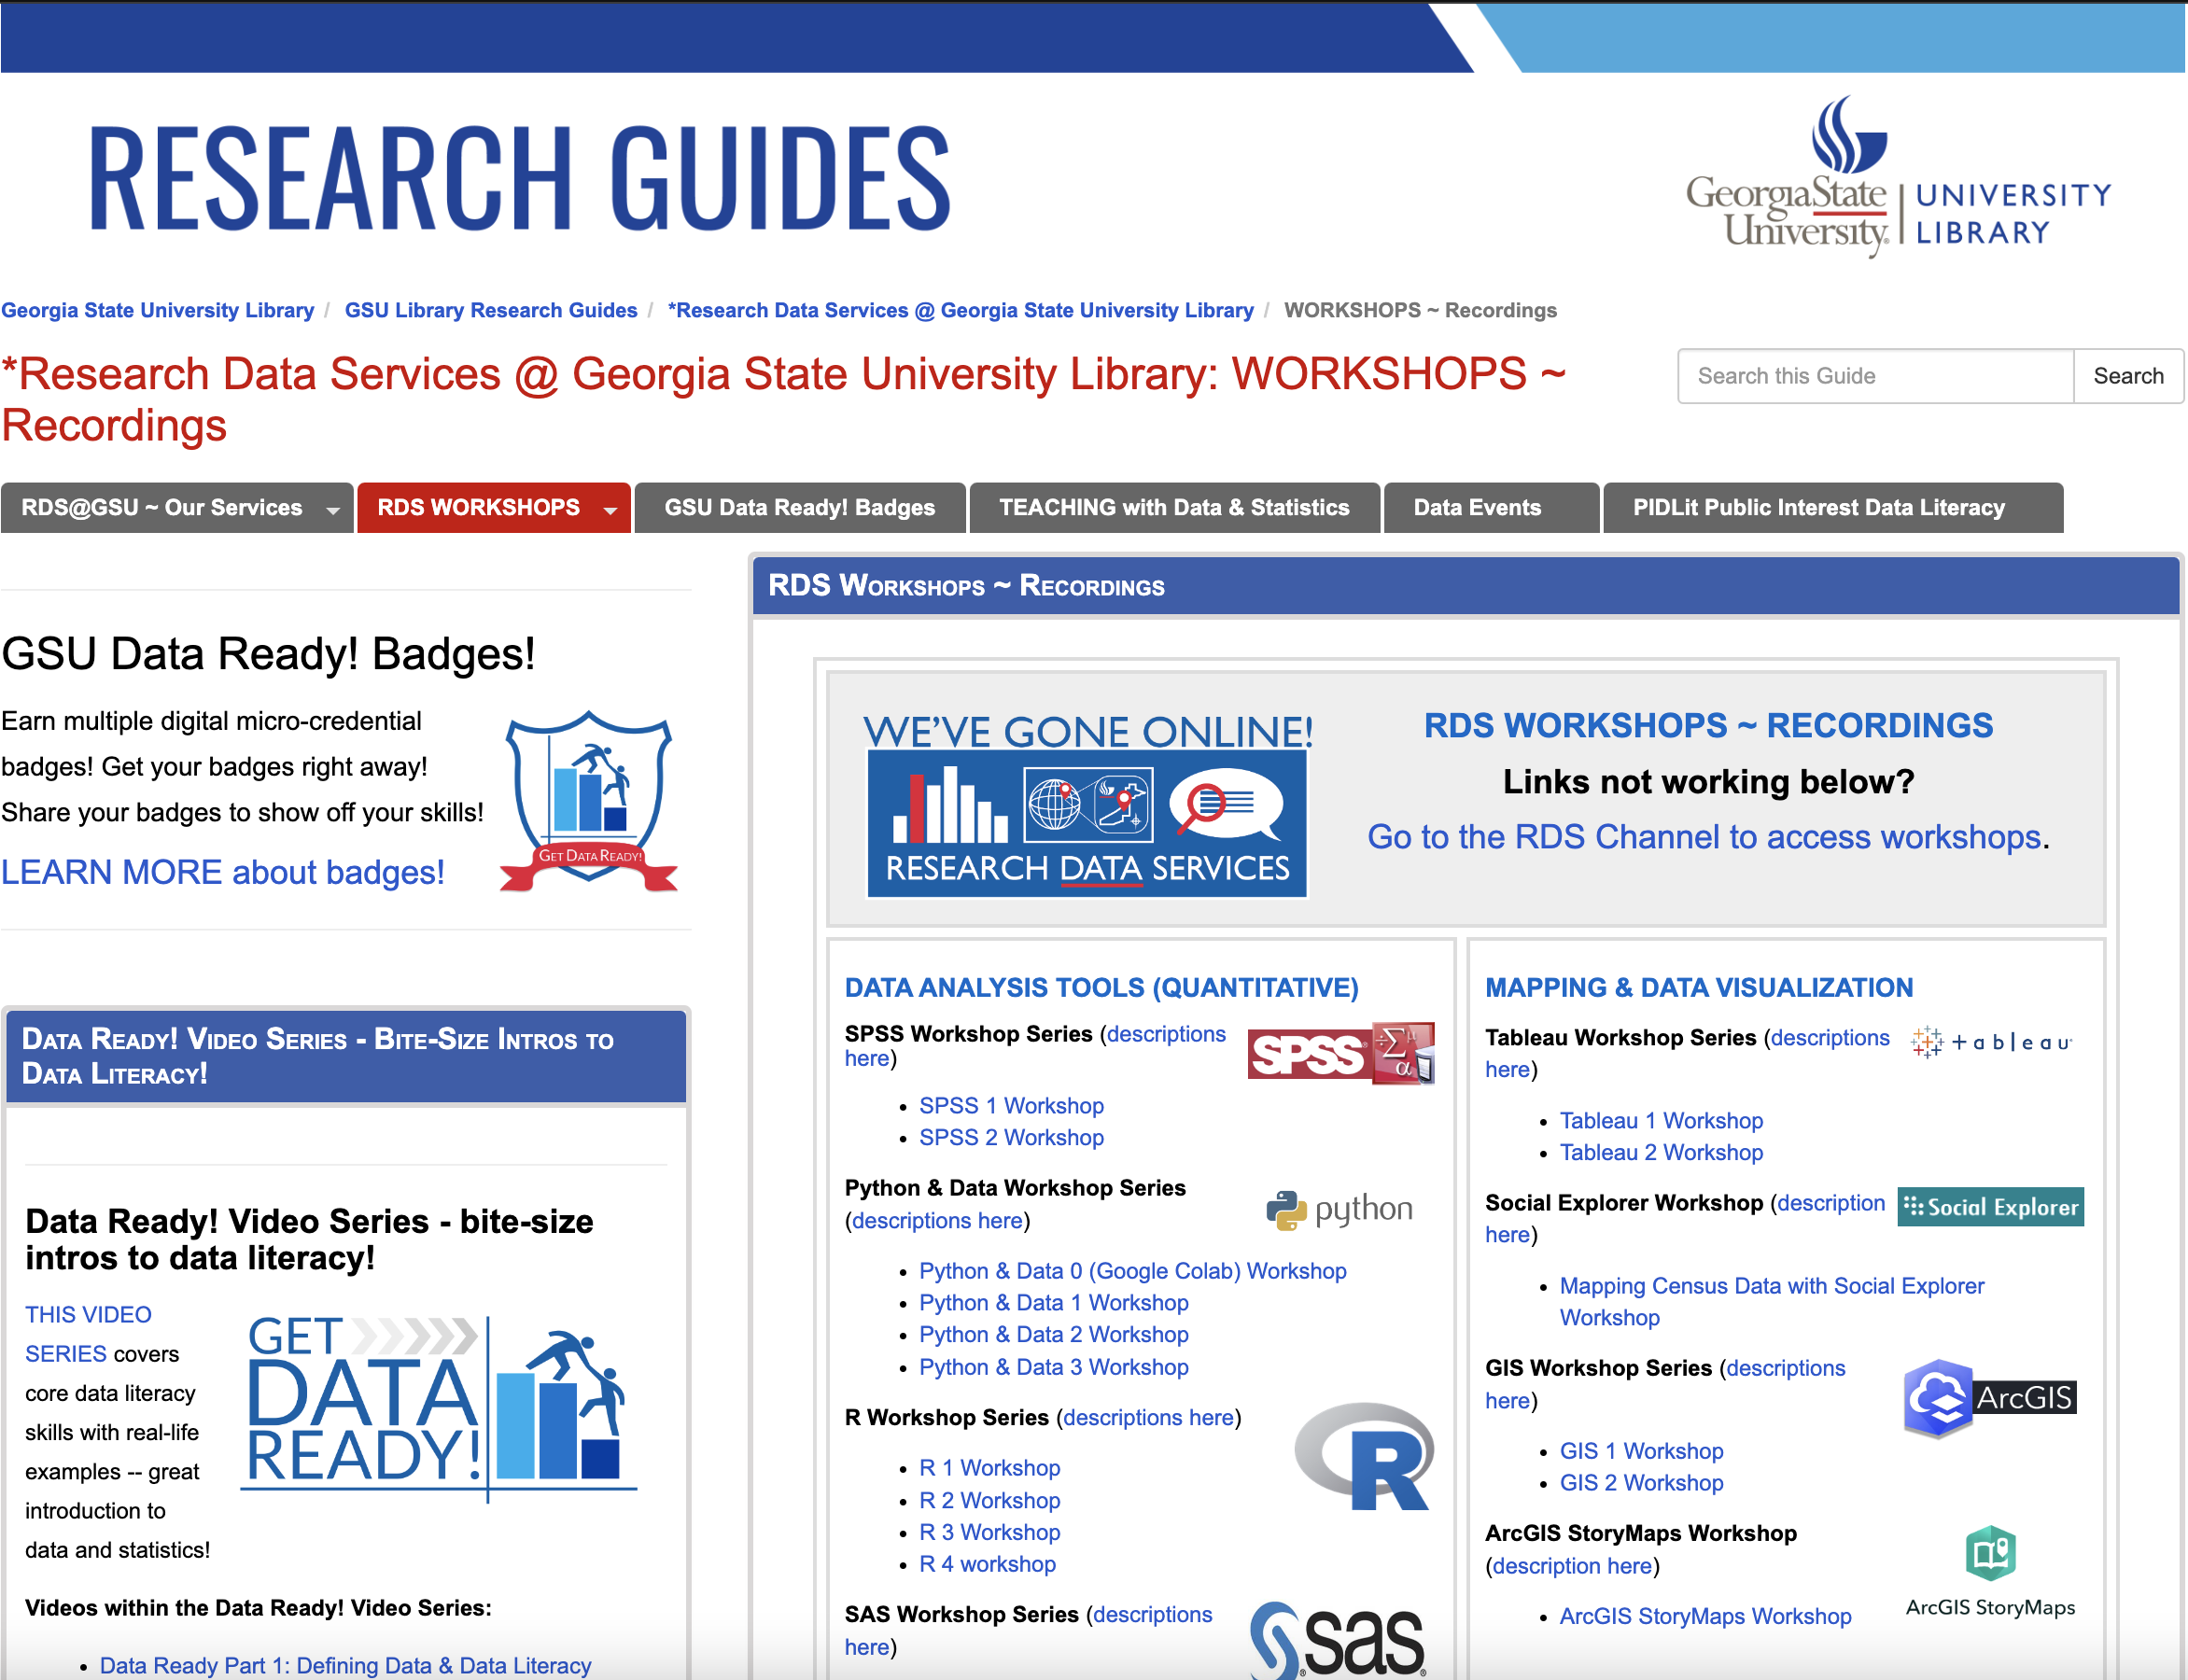

# Badge Program

https://research.library.gsu.edu/dataservices/data-ready

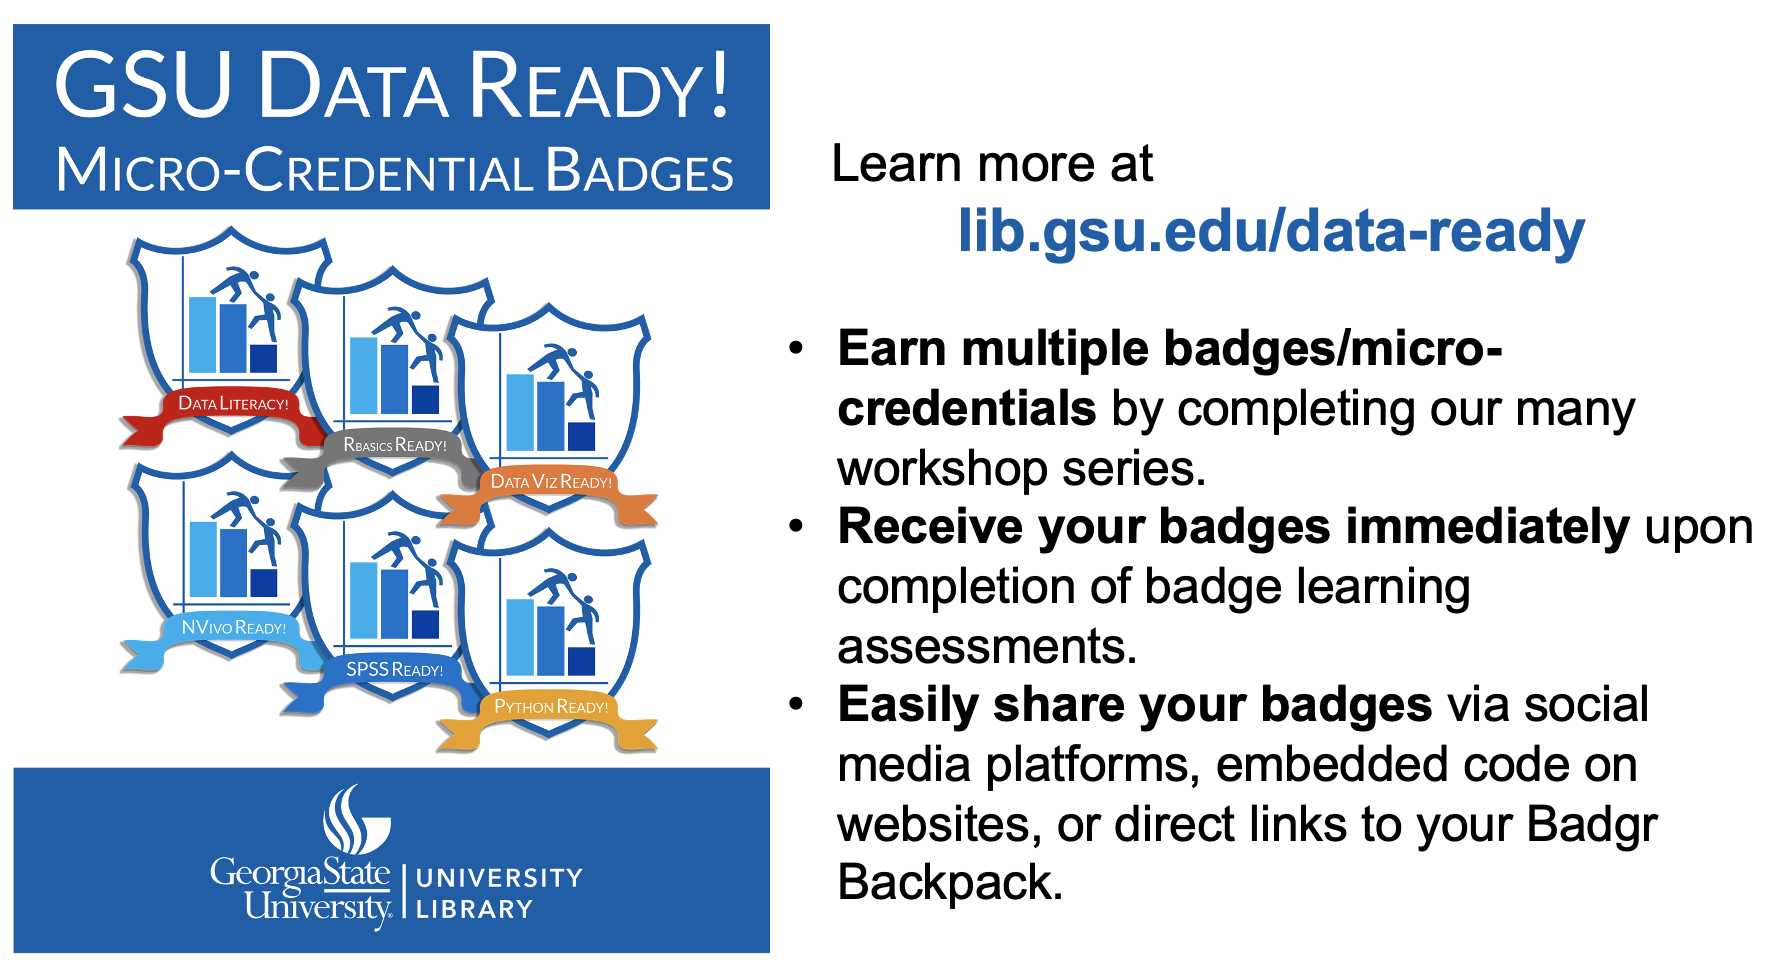

# Stacks

https://gsulibrary.catalog.instructure.com/

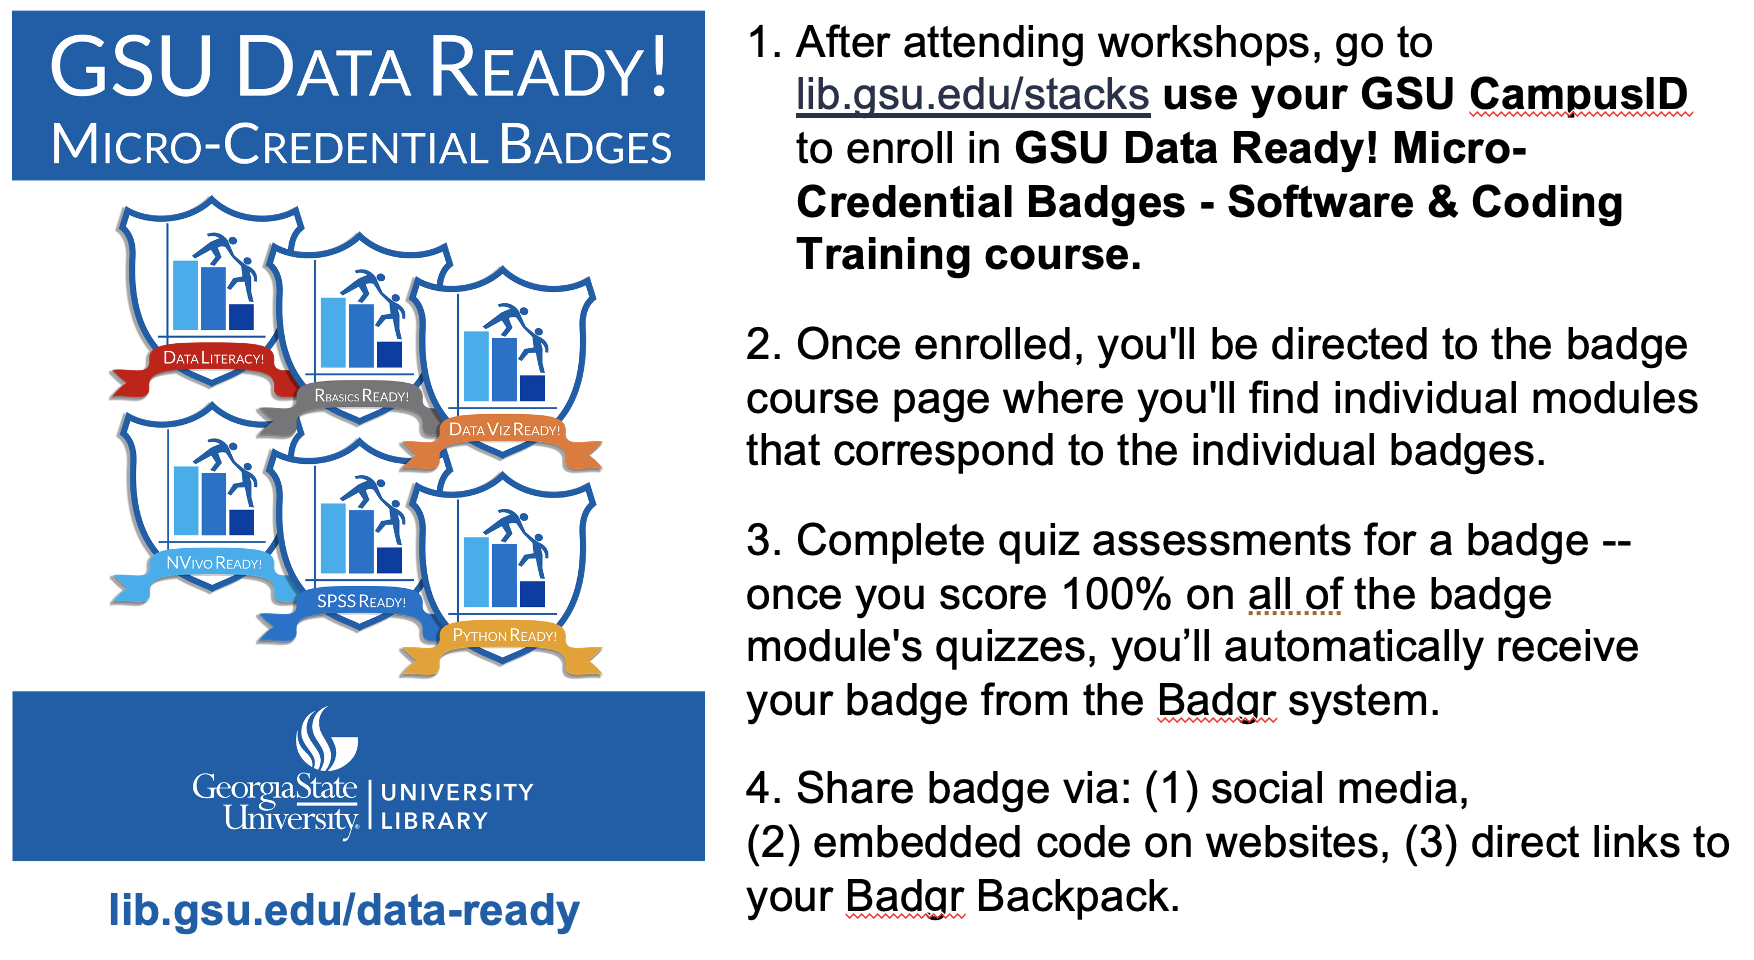

# **Machine Learning - Workshop 002**

**Lesson Plan:**

1.   Review of Univariate Linear Regression, MSE Cost Function, and Gradient Descent
2.   Multiple Linear Regression
3.   Concepts from Linear Algebra (i.e., Vectorization)
4.   Useful features in numpy & python
5.   A Speed Demonstration
6.   Gradient Descent for Multiple Linear Regression
7.   Implementation in Python
8.   Feature Scaling
9.   Feature Scaling - Univariate Example


# 1. Review of Univariate Linear Regression, MSE Cost Function, and Gradient Descent

In the first workshop, we covered a supervised learning algorithm that made predictions using a linear regression model with one feature:
$$ $$
$$ \widehat y^{(i)} = f_{\beta_0,\beta_1}(x^{(i)}) = \beta_0 + \beta_1 \cdot x^{(i)} \tag{Eq. 2.1}$$
$$ $$
Using the model above, we predicted values of **y** using a single feature, **x**. In our example, the target value, **y**, was the price of a house (measured in thousands of dollars), and the feature input used was the size of a house (measured in thousands of square feet).
$$ $$
Recall that the model has two parameters: $\beta_0$ and $\beta_1$ (the intercept and slope, respectively). In the machine learning literature, model parameters are sometimes denoted as **"weights"** (i.e., *$w_0$*,  *$w_1$*, ..., *$w_n$*) or sometimes denoted with the Greek letter theta (i.e., *$\theta_0$*,  *$\theta_1$*, ..., *$\theta_n$*).
$$ $$
In our example, the intercept term is interpreted as the price of a house when $\beta_1$ = 0 (or when square footage = 0). The slope parameter is interpreted as the expected change in the price when square footage increases by one unit (e.g., +/- 1,0000 sq ft).
$$ $$
We measured the cost of the model using $\frac{1}{2} \cdot$ Mean Squared Error (or MSE):
$$ $$
$$J(\beta_0,\beta_1) = \frac{1}{2m} \sum\limits_{i = 1}^{m} (f_{\beta_0,\beta_1}(x^{(i)}) - y^{(i)})^2 \tag{Eq. 2.2}$$
$$ $$
And finally, we obtained estimates for the optimal parameters using the following gradient descent algorithm:
$$ $$
$ Repeat $ $ \{ $
$$ $$
$$ \beta_0 := \beta_0 - \alpha \cdot \frac{\partial}{\partial \beta_0} J(\beta_0,\beta_1)
\ $$
$$ \tag{Eq. 2.3} $$
$$ \beta_1 := \beta_1 - \alpha \cdot \frac{\partial}{\partial \beta_1} J(\beta_0,\beta_1) $$
$$ $$
$ \} $

# 2. Multiple Linear Regression

What if we want to make predictions using more than one feature? Using our housing example, you can easily imagine that there are likely many other factors that impact the price of a house beyond just the size of a house. Perhaps those factors include but are not limited to: number of bedrooms, number of bathrooms, the age of the house, etc. In this workshop, we will expand our linear regression model to include multiple features (or predictors). Hence, we will construct a **"Multiple Linear Regression"** model to predict **y**. 
$$ $$
Let's suppose that we want to create a linear model with **n** features (i.e., $x_1$, $x_2$, ..., $x_n$). The model will include **n+1** parameters: A parameter, $\beta_0$, to represent the intercept term, and **n** parameters ($\beta_1$, $\beta_2$, ..., $\beta_n$) representing the weights (or coefficients) of the features. The model can be written as follows:
$$ $$
$$ \widehat y^{(i)} = \beta_0 + \beta_1  x_1^{(i)} + \beta_2  x_2^{(i)} + \ ... \ + \beta_n  x_n^{(i)} \tag{Eq. 2.4}$$
$$ $$
where:
- $\widehat y$ : predicted values of y
- $x_j$ : the $j^{th}$ feature or input
- $\beta_0$ : the intercept parameter
- $\beta_j$ : the $j^{th}$ parameter (or weight)

$$ $$
We can rewrite (Eq. 2.4) more succinctly using the following form:
$$ $$
$$ \widehat y^{(i)} = \beta_0 + \sum\limits_{j = 1}^{n} \beta_j  x_j^{(i)} \tag{Eq. 2.5}$$

# 3. Concepts from Linear Algebra (i.e., Vectorization)

In linear algebra, a vector is a mathematical object that represents a magnitude and direction. A row vector is a vector that is represented by a 1-dimensional array of numbers, written horizontally, i.e., `(1 x n)`. For example, a row vector with 3 elements could be represented as:
$$ $$
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$$ $$
On the other hand, a column vector is also a vector, but it is represented by a 1-dimensional array of numbers written vertically, i.e., `(m x 1)`. For example, a column vector with 3 elements could be represented as:
$$ $$
\begin{bmatrix}
1 \\
2 \\
3 
\end{bmatrix}
$$ $$
An object can be denoted with an arrow to indicate the object is a vector such as: $ \vec{v} $.
$$ $$
A matrix is an `(m x n)` rectangular array of numbers, with `m` rows and `n` columns. A matrix can be thought of as a collection of row vectors or column vectors. For example, a 3x3 matrix might look like:
$$ $$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$ $$
In this case, the first row represents a row vector [1, 2, 3], the second row represents another row vector [4, 5, 6], and the third row represents another row vector [7, 8, 9]. The first column represents a column vector [1, 4, 7], the second column represents another column vector [2, 5, 8], and the third column represents another column vector [3, 6, 9].
$$ $$
Matrices are typically denoted by boldface uppercase letters such as **A**, often with subscripts included to denote the size of the matrix, such as **$A_{(m x n)}$**. When referencing a particular element within a matrix, (e.g., **$A_{i,j}$**), the subscript *$_{i,j}$* may be used to indicate the element located in the $i^{th}$ row and $j^{th}$ column of the matrix **A**. 
$$ $$
Matrices can be used to represent a wide range of mathematical objects and operations, including systems of linear equations, transformations of geometric objects, and more.
$$ $$
In linear algebra, the dot product, also known as the scalar product or inner product, is a mathematical operation that takes two vectors of the same dimensionality and produces a scalar.
$$ $$
To calculate the dot product of two vectors, you multiply the corresponding components of each vector and then add up the results. For example, if you have two *n*-dimensional vectors, $ \vec{a} $ = [$a_1$, $a_2$,  ... \, $a_n]$ and $ \vec{b} $ = [$b_1$, $b_2$,  ... \, $b_n]$, their dot product (written as $ \vec{a} \cdot \vec{b}$) would be:
$$ $$
$$ \vec{a} \cdot \vec{b} = (a_1 b_1) + (a_2 b_2) +\ ... \ + (a_n b_n) $$
$$ $$
The dot product has several important properties, such as being commutative (A · B = B · A) and distributive (A · (B + C) = A · B + A · C). It is often used in linear algebra to calculate the angle between two vectors or to project one vector onto another. Additionally, the dot product can be used to test whether two vectors are orthogonal (i.e., perpendicular) to each other; if A · B = 0, then A and B are orthogonal.
$$ $$
Now that we've covered a few concepts from linear algebra, we can rewrite (Eq. 2.4) using our newly learned syntax:
$$ $$
$$ f_{\beta_0,\vec{\beta}}(\vec{x}) = \beta_0 + \vec{\beta} \cdot \vec{x} \tag{Eq. 2.6}$$
$$ $$
where:
- $\beta_0$ : a scalar (i.e., a number)
- $\vec{\beta}$ = [$\beta_1, \beta_2, \ ..., \ \beta_n$] $ $ (i.e., a vector of `n` parameters)
- $\vec{x}$ = [$x_1, x_2, \ ..., \ x_n$] $ $ (i.e., a vector of `n` features)
$$ $$

Programmatically, it may be helpful to construct an `(m x n+1)` matrix, **X**, of features such that:
$$ $$
$$ X = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1n}\\
1 & x_{21} & x_{22} & \dots & x_{2n}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix} $$

where:
- The first column of **X** is a column vector of 1's.
- The remaining columns of **X** are the features (e.g., column 2 is $x_1$).
- The matrix contains `m` rows, representing the number of training examples.
$$ $$

And to estimate an `(n+1 x 1)` column vector, $\vec{\beta}$ in the form:
$$ $$
$$ \vec{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_n 
\end{bmatrix} $$
$$ $$
such that:
$$ $$
$$ \vec{y} = f_{\vec{\beta}}(X) = X \cdot \vec{\beta} \tag{Eq. 2.7}$$
$$ $$
$$ $$
$$ \vec{y} = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1n}\\
1 & x_{21} & x_{22} & \dots & x_{2n}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_n 
\end{bmatrix} = \begin{bmatrix}
\beta_0 + x_{11} \beta_1 + x_{12} \beta_2 + \ ... \ + x_{1n} \beta_n\\
\beta_0 + x_{21} \beta_1 + x_{22} \beta_2 + \ ... \ + x_{2n} \beta_n\\
\vdots \\
\beta_0 + x_{m1} \beta_1 + x_{m2} \beta_2 + \ ... \ + x_{mn} \beta_n
\end{bmatrix} = \begin{bmatrix}
\beta_0 + \beta_1  x_1^{(1)} + \beta_2  x_2^{(1)} + \ ... \ + \beta_n  x_n^{(1)}\\
\beta_0 + \beta_1  x_1^{(2)} + \beta_2  x_2^{(2)} + \ ... \ + \beta_n  x_n^{(2)}\\
\vdots \\
\beta_0 + \beta_1  x_1^{(m)} + \beta_2  x_2^{(m)} + \ ... \ + \beta_n  x_n^{(m)}
\end{bmatrix}$$
$$ $$
$$ $$

* $\vec{y} $ is an `m x 1` column vector.
* Those with prior exposure to linear algebra will recognize the operations above are equivalent to matrix multiplication (i.e., $ \vec{y} = X \vec{\beta} $) which is a kind of "dot product in disguise".
$$ $$

To show how vectorization is useful in programming, let's take a look at a piece of code adapted from the last workshop. Previously, we used a "for loop" to iteratively calculate each prediction of **$y^{(i)}$** using our univariate linear regression model:

In [ ]:
# Import necessary modules
import numpy as np

# Create data set
x = np.array([1.0, 2.0])

# Let b0 = 100, b1 = 200
b0 = 100
b1 = 200

# Create for loop to compute predictions (without vectorization)
m = x.shape[0]
f_b = np.zeros(m)
for i in range(m):
  f_b[i] = b0 + b1 * x[i]

# Print output
print(f_b)

[300. 500.]


This method can be extended to our multiple linear regression model:

In [ ]:
# Create a data set with 3 features:
x1 = np.array([1.0, 2.0])
x2 = np.array([0.4, 0.6])
x3 = np.array([7.0, 5.0])

# Let b0 = 100, b1 = 200, b2 = 500, b3 = -40
b0 = 100
b1 = 200
b2 = 500
b3 = -40

# Create for loop to compute predictions (without vectorization)
m = x1.shape[0]
f_b = np.zeros(m)
for i in range(m):
  f_b[i] = b0 + (b1 * x1[i]) + (b2 * x2[i]) + (b3 * x3[i])

# Print output
print(f_b)

[220. 600.]


We can adapt the for loop to handle a data set containing multiple features:

In [ ]:
# Create a data set with intercept + 3 features:
X = np.array([[1.0, 1.0],
              [1.0, 2.0],
              [0.4, 0.6],
              [7.0, 5.0]])

X = X.T  # Transpose the data
print(X)

[[1.  1.  0.4 7. ]
 [1.  2.  0.6 5. ]]


In [ ]:
# Create an array of parameters (b0, b1, b2, b3)
b = np.array([100, 200, 500, -40])
print(b)

[100 200 500 -40]


In [ ]:
# Create for loop to compute predictions (without vectorization)
m = X.shape[0]  # this should return the number of training examples
n = X.shape[1]  # this should return the number of parameters (including b0)
f_b = np.zeros(m)
for i in range(m):
    for j in range(n):
        f_b[i] += b[j] * X[i,j]

# Print output
print(f_b)

[220. 600.]


In [ ]:
# The "for loop" above is equivalent to:
print((b[0] * X[0,0]) + (b[1] * X[0,1]) + (b[2] * X[0,2]) + (b[3] * X[0,3]))
print((b[0] * X[1,0]) + (b[1] * X[1,1]) + (b[2] * X[1,2]) + (b[3] * X[1,3]))

220.0
600.0


Still, this code can be made even simpler using vectorization:

In [ ]:
# Create a data set with intercept + 3 features:
X = np.array([[1.0, 1.0],
              [1.0, 2.0],
              [0.4, 0.6],
              [7.0, 5.0]]) # m = 2

X = X.T  # Transpose the data set
print(X)

# Create an array of parameters (b0, b1, b2, b3)
b = np.array([100, 200, 500, -40])

# Compute predictions (with vectorization):
f_b = np.dot(X, b) # Here the order does matter as np.dot(b, X) will return an error

# print output
print(f_b)

[[1.  1.  0.4 7. ]
 [1.  2.  0.6 5. ]]
[220. 600.]


There are two main benefits of vectorization:

1. The code is shorter and simpler
2. The code will run much faster (i.e., 1 step vs. `m ` steps)

Now that we've covered vectorization, let's review a few more helpful features in the numpy library.

# 4. Useful features in numpy & python

Numpy documentation: [Numpy.org](https://numpy.org/doc/stable/) 

NumPy is a popular Python library for numerical computing that provides a powerful N-dimensional array object, known as ndarray or simply "NumPy array". A NumPy array is a grid of values, all of the same data type, that is indexed by a tuple of nonnegative integers. In other words, it is a homogeneous, multidimensional array that can hold any type of data, including integers, floats, and complex numbers.
$$ $$
Some of the key features of NumPy arrays include:
$$ $$
*   Fast, efficient array processing: NumPy arrays are optimized for numerical operations, which allows for faster computations than traditional Python lists or arrays.
*   Flexible indexing and slicing: You can access elements and sub-arrays of a NumPy array using indexing and slicing operations, which allows for fast and efficient data manipulation.
*   Broadcasting: NumPy arrays can automatically broadcast operations across arrays of different shapes and sizes, which simplifies code and makes it easier to perform complex computations.
*   Linear algebra operations: NumPy provides a wide range of linear algebra operations, including matrix multiplication, eigenvalues, and singular value decomposition.

Creating arrays:

In [ ]:
a = np.zeros(5); print(a) # creates a 1x5 array of zeros


[0. 0. 0. 0. 0.]


In [ ]:
b = np.array([5.0, 4.0, 3.0, 2.0, 1.0]); print(b) # creates a 1x5 array of custom values

[5. 4. 3. 2. 1.]


Indexing & creating arrays of various dimensions:

In [ ]:
b[0] # indexes begin at zero, b[0] accesses the first element in b

5.0

In [ ]:
b[2] # access the third element in b, keep in mind you need to think in terms of array[n-1] to acces the element you want

3.0

In [ ]:
b[-1] # access the last element, negative indexes count from the end

1.0

In [ ]:
c = np.zeros((3, 4)); print(c) # creates a 3x4 array of zeros

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
d = np.ones((2, 2, 2)); print(d) # creates a 2x2x2 array of ones

[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]


In [ ]:
# The .shape function returns the dimensions of a numpy array. It is a tuple of integers that specify the size of each dimension of the array.

print(b.shape)

(5,)


In [ ]:
print(c.shape)

(3, 4)


In [ ]:
print(d.shape)

(2, 2, 2)


Creating a column vector:

In [ ]:
e = b.reshape(-1, 1); print(e) # creates a 5x1 array

[[5.]
 [4.]
 [3.]
 [2.]
 [1.]]


In the code snippet above, reshape(-1, 1) is used to reshape the 1D array into a 2D column vector with one column and as many rows as necessary to hold all the values. The -1 in reshape() means NumPy should figure out the size of that dimension based on the size of the input array and the size of the other dimension (which is specified as 1 in this case).

Slicing:

The syntax for slicing in python is:

`sequence[start:end:step]`
$$ $$

Here's what each part of the syntax means:

*   `start:` the index of the first element to include in the slice. If you omit this value, Python assumes you want to start at the beginning of the sequence.
*   `end:` the index of the first element to exclude from the slice. If you omit this value, Python assumes you want to slice until the end of the sequence.
*   `step:` the amount to increment the index by between elements in the slice. If you omit this value, Python assumes you want to use a step of 1.
$$ $$

Let's see some examples:

In [ ]:
letters = ['a', 'b', 'c', 'd', 'e']

Remember that indexing begins at 0 (i.e., 0 returns the first element, 1 returns the second element, and so on...)

In [ ]:
letters[1:4] # Returns the 2nd, 3rd, and 4th elements

['b', 'c', 'd']

In [ ]:
letters[:3] # Returns the 1st, 2nd, and 3rd elements

['a', 'b', 'c']

In [ ]:
letters[2:] # Returns everything after the 2nd element (i.e., 3rd, 4th, and 5th)

['c', 'd', 'e']

In [ ]:
letters[::2] # We use a step value of 2, so we're skipping every other element in the list

['a', 'c', 'e']

In [ ]:
letters[::-1] # we use a negative step value of -1, which means we're iterating over the sequence in reverse order.

['e', 'd', 'c', 'b', 'a']

More examples of slicing using a numpy array...

In [ ]:
# .arrange(n) function creates an n x 1 array with elements: [0, 1, ..., n-1]
f = np.arange(10); print(f)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# access 5 consecutive elements (start:stop:step)
f[2:7:1]

array([2, 3, 4, 5, 6])

Notice that the array returned above starts at the $3^{rd}$ element and includes the $7^{th}$ element

In [ ]:
# access 3 elements separated by two 
f[2:7:2]

array([2, 4, 6])

In [ ]:
# access all elements index 3 and above
f[3:]

array([3, 4, 5, 6, 7, 8, 9])

Notice that the array above begins with the $4^{th}$ element

In [ ]:
# access all elements below index 3
f[:3]

array([0, 1, 2])

Notice that the array above includes the $3^{rd}$ element

In [ ]:
# access all elements
f[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Remove all of the arrays from memory
del(letters, a, b, c, d, e, f)

# 5. A Speed Demonstration

Below, we will show how vectorization is faster than for loops

In [ ]:
import time

In [ ]:
np.random.seed(42) # Set seed for reproducibility
a = np.random.rand(10000000)
b = np.random.rand(10000000)

In [ ]:
# Return the first 10 elements of a
a[:10]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [ ]:
# Return the first 10 elements of b
b[:10]

array([0.92653825, 0.38246123, 0.87146943, 0.76147139, 0.32882552,
       0.98882078, 0.12073842, 0.35890504, 0.95446169, 0.00471146])

Computing a dot product with a custom function using a for loop:

In [ ]:
def my_dot(a, b): 
    """
   Compute the dot product of two vectors
 
    Args:
      a (ndarray (n,)):  input vector 
      b (ndarray (n,)):  input vector with same dimension as a
    
    Returns:
      sum (scalar): 
    """
    sum = 0
    for i in range(a.shape[0]):
        sum = sum + a[i] * b[i]
    return sum

tic_0 = time.time()  # capture start time
c = my_dot(a,b)
toc_0 = time.time()  # capture end time

print(f"Result =  {c:.2f}")
print(f"Loop version duration: {1000*(toc_0-tic_0):.4f} ms")

Result =  2500473.91
Loop version duration: 6146.8759 ms


Now computing with vectorization:

In [ ]:
tic_1 = time.time()  # capture start time
c = np.dot(a, b)
toc_1 = time.time()  # capture end time

print(f"Result =  {c:.2f}")
print(f"Vectorized version duration: {1000*(toc_1-tic_1):.4f} ms")

Result =  2500473.91
Vectorized version duration: 20.5493 ms


In this case, how much faster was vectorization?

In [ ]:
amount = (toc_0-tic_0) / (toc_1-tic_1)
percent = ((toc_1-tic_1) / (toc_0-tic_0)) * 100

print(f"In this case, vectorization is approximately {amount:.0f}x faster, i.e., vectorization computes in approximately {percent:.1f}% of the time taken using a for loop.")

In this case, vectorization is approximately 299x faster, i.e., vectorization computes in approximately 0.3% of the time taken using a for loop.


In [ ]:
# remove objects from memory
del(a, b, c, tic_0, toc_0, tic_1, toc_1, my_dot, amount, percent)

# 6. Gradient Descent for Multiple Linear Regression

In the first workshop, we saw that the general case of gradient descent for linear regression looked like this:
$$ $$
$ Repeat $ $ \{ $
\
$ \beta_j := \beta_j - \alpha \ \frac{\partial}{\partial \beta_j} J(\vec{\beta}) \tag{Eq. 2.8}
\ $
\
$ \} $
$$ $$
where:
- `j` : a given parameter (e.g., 0, 1, 2, ...)
- $\alpha$ : the learning rate
- $\frac{\partial}{\partial \beta_j}J(\vec{\beta})$ : the partial derivative of the cost function, $J(\vec{\beta})$, with respect to parameter $\beta_j$
- $ \vec{\beta} = [ \beta_0, \beta_1, ..., \beta_n]$
$$ $$

So, in the case of multiple linear regression, gradient descent has the following form:
$$ $$
$ Repeat $ $ \{ $
$$ $$
$$ \beta_0 := \beta_0 - \alpha \ \frac{\partial}{\partial \beta_0} J(\beta_0,\beta_1, ..., \beta_n)
\ $$
$$ $$
$$ \beta_1 := \beta_1 - \alpha \ \frac{\partial}{\partial \beta_1} J(\beta_0,\beta_1, ..., \beta_n) $$
$$ $$
$$ \vdots $$
$$ $$
$$ \beta_n := \beta_n - \alpha \ \frac{\partial}{\partial \beta_n} J(\beta_0,\beta_1, ..., \beta_n) \tag{Eq. 2.9} $$
$ \} $
$$ $$
Alternatively, we can write gradient descent more succinctly using vector notation:
$$ $$
$ Repeat $ $ \{ $
$$ $$
$$ \beta_j := \beta_j - \alpha \ \frac{\partial}{\partial \beta_j} J(\vec{\beta}) \tag{Eq. 2.10} $$
$ \} $
$$ $$

Finally, gradient descent with partial derivatives explicitly written for the intercept (scalar) and the remaining parameters (or weights) is:
$$ $$
$ Repeat $ $ \{ $
$$ $$
\begin{align}
& \beta_0 := \beta_0 - \alpha \ \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{\beta}}(x^{(i)}) - y^{(i)}) \\ 
\\
& \beta_1 := \beta_1 - \alpha \ \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{\beta}}(x^{(i)}) - y^{(i)}) \ x_1^{(i)} \\
\\
& \beta_2 := \beta_2 - \alpha \ \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{\beta}}(x^{(i)}) - y^{(i)}) \ x_2^{(i)} \\
\\
& \ \ \ \ \ \vdots \\
\\
& \beta_n := \beta_n - \alpha \ \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{\beta}}(x^{(i)}) - y^{(i)}) \  x_n^{(i)} \tag{Eq. 2.11}
\end{align}
$ \} $
$$ $$

Notice that the *intercept* term is the only term *not* multiplied by an *x* term. You may also see the *intercept* term called the "*bias*" parameter.

# 7. Implementation in Python

Let's implement gradient descent using multiple linear regression! Much of our code will look familiar from the first workshop...
$$ $$
We'll begin by importing necessary modules.

In [ ]:
# Import modules
import copy, math
import numpy as np
import matplotlib.pyplot as plt

Now let's create some example training data. 
$$ $$
Suppose that we have the following data set:

| $x_1$ = Size (sqft) | $x_2$ = Number of Bedrooms  | $x_3$ = Number of floors | $x_4$ = Age of  Home (years) | $y$ = Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |
$$ $$

In [ ]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

**$X$** is a matrix containing the features of our training examples. Print "X_train":

In [ ]:
# Data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


Obtain the number of training examples, $m$

In [ ]:
X_train.shape[0] # The number of training examples, m = 3

3

$\vec{y}$ is a vector containing our target values. Print "y_train":

In [ ]:
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


Let's add a column vector of 1's to "X_train" to account for the intercept (or bias) parameter:

In [ ]:
# Given Data:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])

# Create a vector of 1's with length = # of training examples
x0 = np.ones(X_train.shape[0]).astype(int)

# Use the function np.hstack to create a column of 1's in X_train
X_train = np.column_stack((x0, X_train))

# Print the matrix
print(X_train)

[[   1 2104    5    1   45]
 [   1 1416    3    2   40]
 [   1  852    2    1   35]]


In [ ]:
print(f"X shape: {X_train.shape}")

X shape: (3, 5)


Now, let's initialize our parameters. For demonstration, $\vec{\beta}$ will be loaded with some initial selected values that are near the optimal. $\vec{\beta}$ is a 1-D NumPy vector.

In [ ]:
b_in = np.array([785.1811367994083, 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_in.shape # the length of b_in is 5 (b0, b1, b2, b3, b4)

(5,)

In [ ]:
print(f"beta shape: {b_in.shape}")

beta shape: (5,)


Create a function that generates predictions using multiple linear regression:

In [ ]:
def linear_model_predict(X, b): 
    """
    single predict using linear regression
    
    Args:
      X (ndarray): Shape (m,n+1) m examples with n features + bias
      b (ndarray): Shape (n+1,1) bias + n model parameters
      
    Returns:
      f_b (ndarray): Shape (m, 1) predictions using multiple linear regression
    """
    f_b = np.dot(X, b)
    return f_b

Use "linear_model_predict" to make predictions and print the output

In [ ]:
y_pred = linear_model_predict(X_train, b_in)
print(np.round(y_pred))

[460. 232. 178.]


Create a function that computes the cost of the model:

In [ ]:
def compute_cost(X, y, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n+1)) : Data, m examples with n features + bias parameter
      y (ndarray (m,))    : target values
      b (ndarray (n+1,))  : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    f_b = np.dot(X, b)
    cost = (1/(2*m))*sum((f_b - y)**2)
    return cost

In [ ]:
total_cost = compute_cost(X_train, y_train, b_in)
print(total_cost)

1.5578904342585886e-12


Now create a function to compute gradient descent for multiple linear regression given a vector of initialized parameters ($\beta_0, \beta_1, \beta_2, ..., \beta_n$):

In [ ]:
def compute_gradients(X, y, b):
    """
    Computes the gradient for multiple linear regression

    Args:
    X -- ndarray with shape (m, n+1), where m is the number of training examples and n is the number of features.
         The first column of X is a column of all 1's, representing the intercept (or bias) term.
    y -- ndarray with shape (m, 1), where m is the number of training examples.
         The target variable.
    b -- ndarray with shape (n+1, 1), where n is the number of features.
         The weights of the linear regression model. The first element of the array corresponds to the bias term.

    Returns:
    db -- ndarray with shape (n+1, 1), where n is the number of features.
          The gradients of the cost function w.r.t. the parameters (or weights).
    """

    m = X.shape[0] # number of training examples
    y_pred = np.dot(X, b) # predictions of the model
    db = np.dot(X.T, (y_pred - y)) / m # gradient of linear regression w.r.t. the parameter, b_j

    return db

In [ ]:
tmp_dj_db = compute_gradients(X_train, y_train, b_in)

print(tmp_dj_db[0]) # gradient at initial beta_0
print(tmp_dj_db[1]) # gradient at initial beta_1
print(tmp_dj_db[2]) # gradient at initial beta_2
print(tmp_dj_db[3]) # gradient at initial beta_3
print(tmp_dj_db[4]) # gradient at initial beta_4

-1.6739251217738154e-06
-0.002726235766128108
-6.27197261830285e-06
-2.2174557443577214e-06
-6.924033821557411e-05


Finally, create a function to compute gradient descent that utilizes the "linear_model_predict", "compute_cost", and "compute_gradients" functions:

In [ ]:
def gradient_descent(X, y, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn parameters. Updates b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n+1))   : Data, m examples with n features + intercept
      y (ndarray (m,))      : target values
      b_in (ndarray (n+1,)) : initial model parameters  
      cost_function         : function to compute cost
      gradient_function     : function to compute the gradient
      alpha (float)         : Learning rate
      num_iters (int)       : number of iterations to run gradient descent
      
    Returns:
      b (ndarray (n+1,)) : Updated values of parameters 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    b = copy.deepcopy(b_in)  # avoid modifying global b within function
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db = gradient_function(X, y, b)   

        # Update Parameters using b, alpha and gradient
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return b, J_history #return final b and J history for graphing

Let's test the implementation of the gradient descent algorithm:

In [ ]:
# Initialize all parameters to zero
b_in = np.zeros(X_train.shape[1])

# Some gradient descent settings
iterations = 1000
alpha = 0.0000005

# Run gradient descent algorithm
b_final,J_hist = gradient_descent(X_train, y_train, b_in, compute_cost, compute_gradients, alpha, iterations)

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   


In [ ]:
# Print final parameter values
print(f"betas found by gradient descent: {b_final}")

betas found by gradient descent: [-0.00223541  0.20396569  0.00374919 -0.0112487  -0.0658614 ]


In [ ]:
# Make Predictions using b_final parameters
y_pred_final = linear_model_predict(X_train, b_final)
print(y_pred_final)

[426.18530497 286.16747201 171.46763087]


In [ ]:
# Calculate total cost
m = X_train.shape[0]
total_cost_final = (1/(2*m))*sum((y_pred_final-y_train)**2)
print(total_cost_final)

686.7034116665195


In [ ]:
# Or simply print the last value of J_hist
J_hist[-1]

686.7034116665195

Plot the Cost vs. iteration

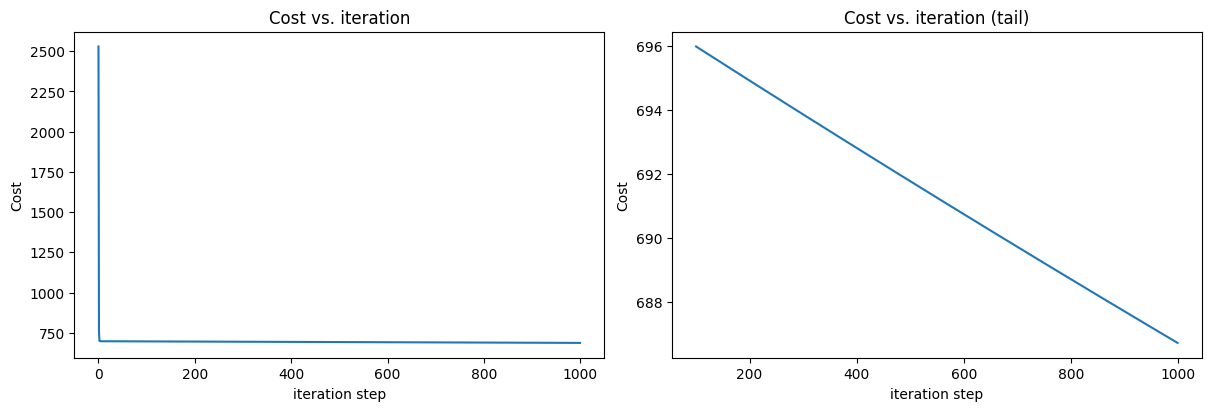

In [ ]:
# plot cost versus iteration 

# Set default plot resolution to 100 dpi
plt.rcParams['figure.dpi'] = 100

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

# 8. Feature Scaling

When a variable takes on larger values, the corresponding parameter tends to be smaller, whereas when a variable takes on smaller values, the corresponding parameter tends to be larger. Here's an example:
$$ $$
Suppose that the range of house size (sq ft) is: 300 < $x_1$ < 2,000 \\
And suppose that the range of # of bedrooms is: 1 < $x_2$ < 7
$$ $$
And suppose the model is: \\
price (measured in \$1,000's) = 50 + 0.1*(sq ft) + 50*(# of bedrooms)
$$ $$
So, for a house with 2,000 sq ft and 5 bedrooms, the predicted price would be: 50 +  0.1*(2000) + 50*(5) = 50 + 200 + 250 = \$500k
$$ $$
When features have different scales, gradient descent works more slowly...
$$ $$
**The intuition**: \\
If there is a vast difference in the ranges between features - say one feature ranges in the thousands while another ranges in the tens, gradient descent makes the underlying assumption that higher ranging numbers are sort of "more important" or hold a larger "weight" in the algorithm. So the feature with the larger values starts to play a more decisive or dominant role while training the model.
$$ $$
**Three Types of Scaling:**
$$ $$
1. Min-max normalization
$$ $$
Also known as min-max scaling, min-max normalization is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. This feature scaling method does not result in a "normal" (or Guassian) distribution. The general formula is given as:
$$  $$
$$ x^{'} = \frac{x - min(x)}{max(x) - min(x)} \tag{Eq. 2.12}$$
$$ $$
2. Mean normalization
$$ $$
Mean normalization results in a new distribution with a mean of zero. This can help improve the performance of certain machine learning algorithms by reducing the scale of the data and making the features more comparable. However, it does not necessarily change the shape of the distribution of the feature values or conform the distribution to a "normal" (or Guassian) distribution. The formula is given as:
$$ $$
$$ x^{'} = \frac{x - \bar{x}}{max(x) - min(x)} \tag{Eq. 2.13} $$ \\
where:
 - $x$ is the original value
 - $\bar{x}$ = average($x$) is the mean of the feature
$$ $$
3. Standardization (Z-score Normalization)
$$ $$
Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and artificial neural networks).
$$ $$
If the original feature distribution is close to a Gaussian distribution, then z-score normalization may result in a distribution that is more Gaussian-like, but if the original distribution is highly skewed or has a heavy tail, then the resulting distribution may still deviate significantly from a normal (or Gaussian) distribution. The formula is given as:
$$ $$
$$ x^{'} = \frac{x - \bar{x}}{\sigma_x} \tag{Eq. 2.14} $$ \\
where:
 - $x$ is the original value
 - $\bar{x}$ = average($x$) is the mean of the feature
 - $\sigma_x$ is the standard deviation of the feature

Sample standard deviation formula:
$$ $$
$ \sigma_x = \sqrt{\frac{\sum\limits_{i=1}^{m} (x_i - \bar{x})^2}{m-1}} \tag{Eq. 2.15} $
$$ $$
where $m$ = the number of training examples

To visualize the importance of feature scaling, let's take a look at an example using a univariate linear regression model:

# 9. Feature Scaling - Univariate Example

Import modules:

In [ ]:
# Import modules
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Create data set, initialize parameters, and set hyperparameters:

In [ ]:
"""
Feature Scaling - Univariate Example
"""

# Create training data set
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.3])
y_train = np.array([250, 325, 480, 430, 630, 730])

Create functions

In [ ]:
# Create a function that computes cost of model given training set & parameters
def compute_cost(x, y, b0, b1):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)) : Data, m examples 
      y (ndarray (m,)) : target values
      b0,b1 (scalars)  : model parameters  
    
    Returns
        total_cost (float): The cost of using b0,b1 as the parameters for
                            linear regression to fit the data points in x and y
    """
    m = x_train.shape[0] 
    cost = 0

    for i in range(m):
        f_b = b0 + (b1 * x[i])
        cost = cost + (f_b - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

# Function to Compute Gradient Descent
def compute_gradient(x, y, b0, b1): 
    
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      b0,b1 (scalars): model parameters  
    Returns
      dj_db0 (scalar): The gradient of the cost w.r.t. the parameters b0
      dj_db1 (scalar): The gradient of the cost w.r.t. the parameter b1  
     """

    # Number of training examples
    m = x.shape[0]    
    dj_db0 = 0
    dj_db1 = 0

    for i in range(m):  
        f_b = b0 + (b1 * x[i])
        dj_db0_i = f_b - y[i] 
        dj_db1_i = (f_b - y[i]) * x[i] 
        dj_db0 += dj_db0_i
        dj_db1 += dj_db1_i 
    dj_db0 = dj_db0 / m
    dj_db1 = dj_db1 / m 
    
    return dj_db0, dj_db1

# Compute Gradient Descent
def gradient_descent(x, y, b0_in, b1_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit b0,b1. Updates b0,b1 by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      b0_in, b1_in (scalars): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      b0 (scalar): Updated value of intercept parameter after running gradient descent
      b1 (scalar): Updated value of slope parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [b0,b1] 
      """
   
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b0 = b0_in
    b1 = b1_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_db0, dj_db1 = gradient_function(x, y, b0, b1)     

        # Update Parameters using equation (3) above
        b0 = b0 - alpha * dj_db0                            
        b1 = b1 - alpha * dj_db1                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, b0, b1))
            p_history.append([b0,b1])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:5}: Cost {J_history[-1]:10.1f} ",
                  f"dj_db0: {dj_db0:9.1e}, dj_db1: {dj_db1:9.1e} ",
                  f"b0: {b0:9.2f}, b1:{b1:9.2f}")
 
    return b0, b1, J_history, p_history # return b1 and J, b1 history for graphing

def compute_gradient_at_point(x, y, b0, b1): 
    """
    Computes the gradient for linear regression at a particular point on the cost function
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      b0,b1 (scalars): model parameters
      point (scalar): point at which gradient needs to be calculated  
    Returns
      dj_db0 (scalar): The gradient of the cost w.r.t. the parameter b0 at the given point
      dj_db1 (scalar): The gradient of the cost w.r.t. the parameter b1 at the given point
    """
    # Number of training examples
    m = x.shape[0]    
    dj_db0 = 0
    dj_db1 = 0

    for i in range(m):  
        f_b = b0 + (b1 * x[i])
        dj_db0_i = f_b - y[i] 
        dj_db1_i = (f_b - y[i]) * x[i] 
        dj_db0 += dj_db0_i
        dj_db1 += dj_db1_i 
    dj_db0 = dj_db0 / m
    dj_db1 = dj_db1 / m 
    
    if abs(dj_db1) < 1e-4:
        return 0.0
    else:
        return dj_db1

# Define the partial derivative w.r.t. b1
def partial_derivative_b1(x, y, b0, b1):
    n = len(x)
    error = (b0 + (b1 * x)) - y
    return np.sum(error * x) / n

# Define tangent line
# y = m*(x - x1) + y1
def tangent_line(x, x1, y1, slope):
    return slope*(x - x1) + y1

Initialize parameters and set hyperparameters:

In [ ]:
# Re-initialize parameters
b0 = 0  # initial value for b0
b1 = 0  # initial value for b1

# Some gradient descent settings
iterations = 1000  # number of iterations
tmp_alpha = 0.20  # learning rate

Run gradient descent:

In [ ]:
# Run gradient descent to determine optimal values for b0 and b1
b0_final, b1_final, J_hist, p_hist = gradient_descent(x_train, y_train, b0, b1, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration     0: Cost    13923.4  dj_db0:  -4.7e+02, dj_db1:  -1.2e+03  b0:     94.83, b1:   237.88
Iteration   100: Cost     1362.9  dj_db0:   7.3e-01, dj_db1:  -3.0e-01  b0:     29.31, b1:   198.03
Iteration   200: Cost     1359.7  dj_db0:   1.1e-01, dj_db1:  -4.6e-02  b0:     22.75, b1:   200.68
Iteration   300: Cost     1359.7  dj_db0:   1.7e-02, dj_db1:  -7.0e-03  b0:     21.73, b1:   201.09
Iteration   400: Cost     1359.7  dj_db0:   2.7e-03, dj_db1:  -1.1e-03  b0:     21.58, b1:   201.15
Iteration   500: Cost     1359.7  dj_db0:   4.1e-04, dj_db1:  -1.7e-04  b0:     21.55, b1:   201.16
Iteration   600: Cost     1359.7  dj_db0:   6.4e-05, dj_db1:  -2.6e-05  b0:     21.55, b1:   201.16
Iteration   700: Cost     1359.7  dj_db0:   9.9e-06, dj_db1:  -4.0e-06  b0:     21.55, b1:   201.16
Iteration   800: Cost     1359.7  dj_db0:   1.5e-06, dj_db1:  -6.1e-07  b0:     21.55, b1:   201.16
Iteration   900: Cost     1359.7  dj_db0:   2.3e-07, dj_db1:  -9.5e-08  b0:     21.55, b1:   201.16


Prep for plotting:

In [ ]:
# Define range and step size for b1
b1_values = np.arange(b1_final - 100, b1_final + 100, 1)

# Calculate costs # this is y = f(x) and is a parabola
costs = [compute_cost(x_train, y_train, b0_final, b1) for b1 in b1_values]

offset = b1_final - (min(b1_values) + b1_final)/2

# Identify specific points on cost function for plotting
b1_points = np.array([b1_final - offset, b1_final, b1_final+offset])
cost_points = [compute_cost(x_train, y_train, b0_final, b1) for b1 in b1_points]

# Calculate the gradients at specific points
b1_gradients = np.round([compute_gradient_at_point(x_train, y_train, b0_final, b1) for b1 in b1_points])

Print parameters found by gradient descent:

In [ ]:
print(f'intercept: {b0_final:.2f}, slope: {b1_final:.2f}')

intercept: 21.55, slope: 201.16


Setup for plotting & calculating the cost of the model:

In [ ]:
"""
Setup before plotting data and regression line
"""

# Generate predictions from model
y_pred = b0_final + b1_final * x_train

# Calculate residuals
residuals = y_pred - y_train

# Calculate squared errors
sq_error = residuals**2

# Caclulate total cost given initial parameters
total_cost = compute_cost(x_train, y_train, b0_final, b1_final)
print(f'Model Cost: {total_cost:.2f}')

Model Cost: 1359.66


Plot predictions:

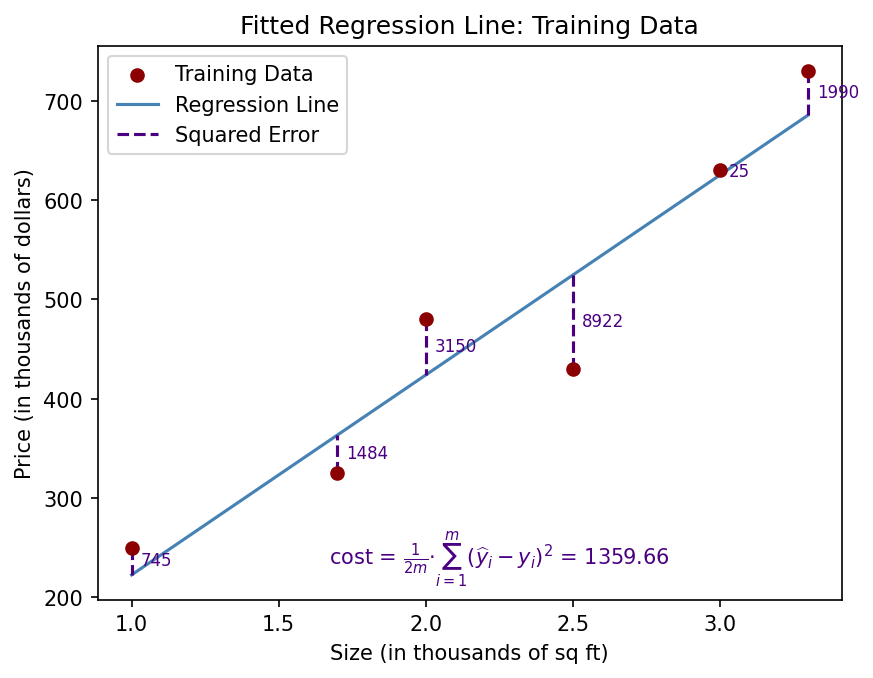

In [ ]:
"""
Plot the training data, regression line, and squared errors
"""

# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the regression line and the training data
scatter_handle = plt.scatter(x_train, y_train, color='darkred', zorder=3, label='Training Data')
line_handle = plt.plot(x_train, y_pred, color='steelblue', label='Regression Line')[0]

# Create a custom Line2D object for the squared error line
error_line = Line2D([0], [0], linestyle='--', color='indigo', label='Squared Error')

# Plot the cost labels with the squared error line
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], y_pred[i]], linestyle='--', color="indigo")
    plt.text(x_train[i] + 0.03, 0.5*abs(y_pred[i]-y_train[i])+np.min([y_pred[i],y_train[i]])-4, f"{sq_error[i]:.0f}", color="indigo", fontsize=8)

# Create text at bottom showing cost formula
plt.text(np.mean(x_train), np.min([y_train, y_pred])+10, 'cost = ' + r'$\frac{1}{2m}$' + r'$\cdot$' + r'$\sum_{i=1}^{m}$' + r'$({\widehat{y}}_i - y_i)^2$' + f' = {total_cost:.2f}', ha='center', color="indigo", label='Total Cost')

# Set labels and title
plt.xlabel('Size (in thousands of sq ft)')
plt.ylabel('Price (in thousands of dollars)')
plt.title('Fitted Regression Line: Training Data')

# Add all three handles to the legend
plt.legend(handles=[scatter_handle, line_handle, error_line], loc='upper left')

# Display the plot
plt.show()

Create 2D contour plot:

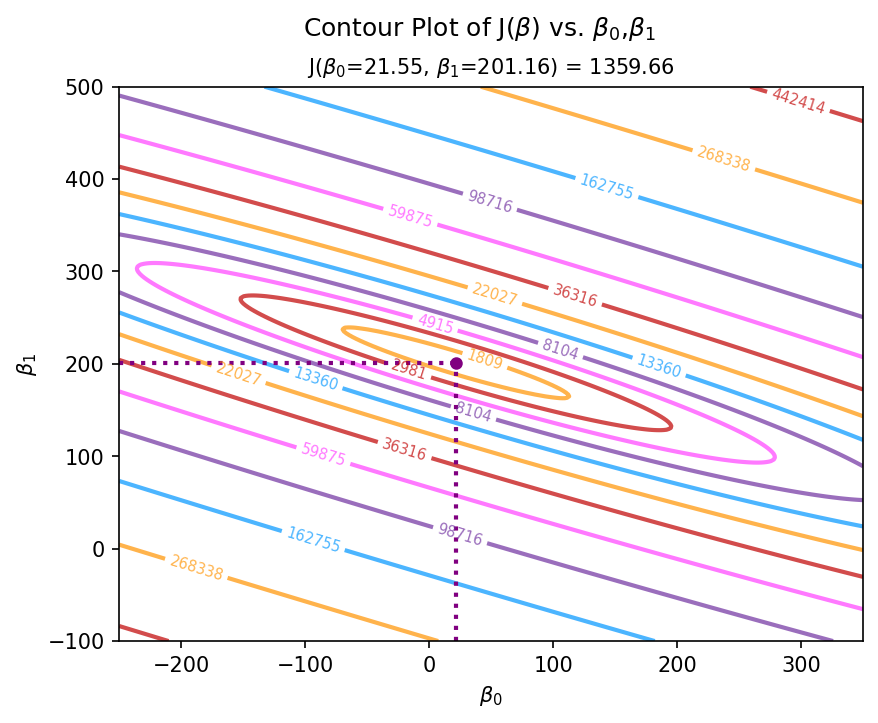

In [ ]:
"""
2D Contour plot of cost(b0,b1) over a range of values for b0 and b1
"""

# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Define a function to format the contour labels
def label_formatter(val):
    return str(math.ceil(np.exp(val)))

# Define the b0 and b1 range
b0_range = np.linspace(-250, 350, 300)
b1_range = np.linspace(-100, 500, 300)

# Create a 2D meshgrid of the b0 and b1 values
b0, b1 = np.meshgrid(b0_range, b1_range)

# Compute the cost for each combination of b0 and b1
cost_vals = np.zeros_like(b0)
for i in range(b0.shape[0]):
    for j in range(b1.shape[0]):
        cost_vals[i,j] = compute_cost(x_train, y_train, b0[i,j], b1[i,j])

# Create a contour plot of the cost function
fig, ax = plt.subplots()

# Use the dictionary dlc to map color names to their hexadecimal codes
dlc = dict(dlblue='#0096ff', dlorange='#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlcolors = [dlc['dlblue'], dlc['dlorange'], dlc['dldarkred'], dlc['dlmagenta'], dlc['dlpurple']]

# Create contour lines
contour = ax.contour(b0, b1, np.log(cost_vals), levels=12, linewidths=2, alpha=0.7, colors=dlcolors)

# Set contour labels and axis labels
ax.clabel(contour, inline=True, fontsize=7, fmt=label_formatter)
ax.set_xlabel(r'$ \beta_0$')
ax.set_ylabel(r'$ \beta_1$')

# Set title and subtitle
fig.suptitle(r'Contour Plot of J($\beta$) vs. $\beta_0$,$\beta_1$')
ax.set_title(r'J($\beta_0$='+f'{b0_final:.2f}, '+r'$\beta_1$='+f'{b1_final:.2f}) = ' + f'{total_cost:.2f}', fontsize=10)

# Plot the purple dotted lines and point
ax.plot([ax.get_xlim()[0], b0_final], [b1_final, b1_final], lw=2, color='purple', ls='dotted')
ax.plot([b0_final, b0_final], [ax.get_ylim()[0], b1_final], lw=2, color='purple', ls='dotted')
ax.scatter(x=[b0_final], y=[b1_final], c='purple', zorder = 3, s = 25)      

# Display the plot
plt.show()

Plot 3D cost surface:

In [ ]:
"""
Using Plotly: Plot 3D surface plot of cost as a function of parameters b0,b1
"""

import plotly.graph_objs as go
import plotly.io as pio

# Define the b0 and b1 range
b0_range = np.linspace(-250, 350, 100)
b1_range = np.linspace(-100, 475, 100)

# Create a meshgrid of beta0 and beta1 values
beta0_mesh, beta1_mesh = np.meshgrid(b0_range, b1_range)

# Calculate the cost for each combination of beta0 and beta1
cost_vals = np.zeros((len(b0_range), len(b1_range)))
for i in range(len(b0_range)):
    for j in range(len(b1_range)):
        cost_vals[i, j] = compute_cost(x_train, y_train, b0_range[i], b1_range[j])

# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(x=beta0_mesh, y=beta1_mesh, z=cost_vals)])
fig.update_layout(title='Cost Surface: No feature scaling', scene=dict(xaxis_title='x = Beta0', yaxis_title='y = Beta1', zaxis_title='z = Cost'))

# Set the height and width of the plot window
fig.update_layout(height=900, width = 1100)

# Display the plot
fig.show()

Store the final parameter values from gradient descent without feature scaling

In [ ]:
# Store b0_final and b1_final:
b0_old = b0_final
b1_old = b1_final

# Print the values for future reference
print(f'{b0_old:.2f}')
print(f'{b1_old:.2f}')

21.55
201.16


Standardize the feature "x_train":

In [ ]:
# Standardize feature x_train so that it's distribution is unit normal
x_mean = np.mean(x_train)
x_std = np.std(x_train)
z_train = (x_train - x_mean) / x_std

# Notice key aspects of z_train:
print(f'mean: {np.mean(z_train):.2}') # notice that this basically equal to 0
print(f'standard deviation: {np.std(z_train)}') # and this is basically equal to 1
print(f'min: {np.min(z_train)}, max: {np.max(z_train)}')

mean: -3.7e-17
standard deviation: 1.0
min: -1.6015553315961828, max: 1.3453064785407933


Re-initialize parameters & hyperparameters, and run gradient descent:

In [ ]:
# Re-initialize parameters b0 and b1
b0 = 0  # initial value for b0
b1 = 0  # initial value for b1

# Some gradient descent settings
iterations = 1000  # number of iterations
tmp_alpha = 0.20  # learning rate

# Run gradient descent to determine optimal values for b0 and b1
b0_new, b1_new, J_hist, p_hist = gradient_descent(z_train, y_train, b0, b1, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration     0: Cost    81194.8  dj_db0:  -4.7e+02, dj_db1:  -1.6e+02  b0:     94.83, b1:    31.40
Iteration   100: Cost     1359.7  dj_db0:  -9.7e-08, dj_db1:  -3.2e-08  b0:    474.17, b1:   157.01
Iteration   200: Cost     1359.7  dj_db0:  -1.0e-13, dj_db1:  -4.6e-14  b0:    474.17, b1:   157.01
Iteration   300: Cost     1359.7  dj_db0:  -1.0e-13, dj_db1:  -4.6e-14  b0:    474.17, b1:   157.01
Iteration   400: Cost     1359.7  dj_db0:  -1.0e-13, dj_db1:  -4.6e-14  b0:    474.17, b1:   157.01
Iteration   500: Cost     1359.7  dj_db0:  -1.0e-13, dj_db1:  -4.6e-14  b0:    474.17, b1:   157.01
Iteration   600: Cost     1359.7  dj_db0:  -1.0e-13, dj_db1:  -4.6e-14  b0:    474.17, b1:   157.01
Iteration   700: Cost     1359.7  dj_db0:  -1.0e-13, dj_db1:  -4.6e-14  b0:    474.17, b1:   157.01
Iteration   800: Cost     1359.7  dj_db0:  -1.0e-13, dj_db1:  -4.6e-14  b0:    474.17, b1:   157.01
Iteration   900: Cost     1359.7  dj_db0:  -1.0e-13, dj_db1:  -4.6e-14  b0:    474.17, b1:   157.01


Calculate cost and prep for plotting

In [ ]:
# Define range and step size for b1 and b0
b0_values = np.arange(b0_new - 800, b0_new + 800, 1)
b1_values = np.arange(b1_new - 600, b1_new + 600, 1)

# Calculate costs 
costs = [compute_cost(z_train, y_train, b0_new, b1) for b1 in b1_values]

# Create offset for plotting
offset = b1_new - (min(b1_values) + b1_new)/2

# Identify specific points on cost function for plotting
b1_points = np.array([b1_new - offset, b1_new, b1_new+offset])
cost_points = [compute_cost(z_train, y_train, b0_new, b1) for b1 in b1_points]

# Calculate the gradients at specific points
b1_gradients = np.round([compute_gradient_at_point(z_train, y_train, b0_new, b1) for b1 in b1_points])

cost_min = compute_cost(z_train, y_train, b0_new, b1_new)
print(f'Total cost: {cost_min:.2f}')

Total cost: 1359.66


Create 2D contour plot w/ feature scaling

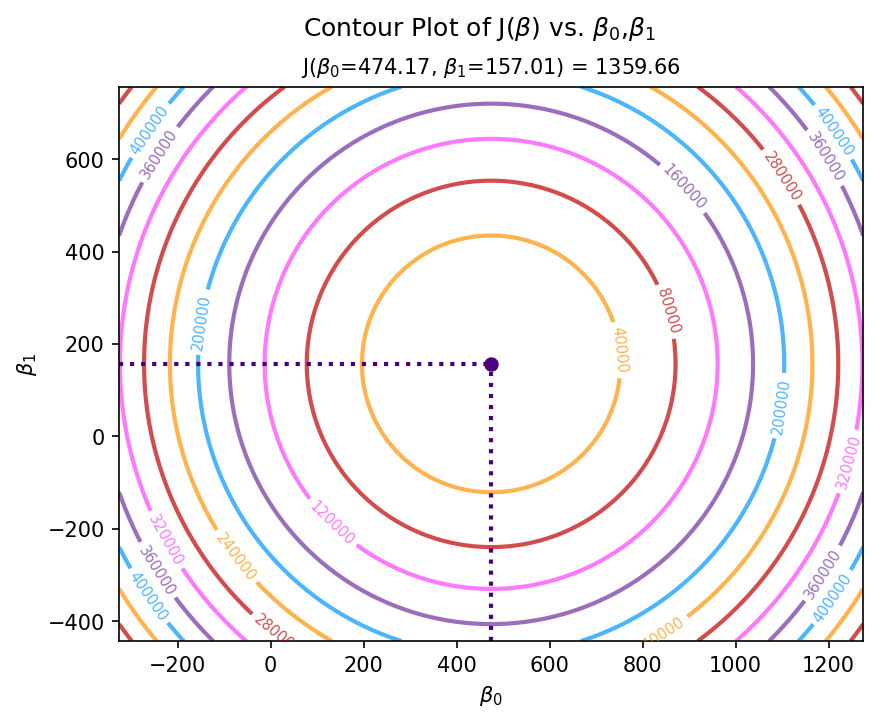

In [ ]:
"""
2D Contour plot of cost(b0,b1) over a range of values for b0 and b1
"""

# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Define the b0 and b1 range
b0_range = np.linspace(b0_new - 800, b0_new + 800, 100)
b1_range = np.linspace(b1_new - 600, b1_new + 600, 100)

# Create a 2D meshgrid of the b0 and b1 values
b0, b1 = np.meshgrid(b0_range, b1_range)

# Compute the cost for each combination of b0 and b1
cost_vals = np.zeros_like(b0)
for i in range(b0.shape[0]):
    for j in range(b1.shape[0]):
        cost_vals[i,j] = compute_cost(z_train, y_train, b0[i,j], b1[i,j])

# Create a contour plot of the cost function
fig, ax = plt.subplots()

# Use the dictionary dlc to map color names to their hexadecimal codes
dlc = dict(dlblue='#0096ff', dlorange='#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
dlcolors = [dlc['dlblue'], dlc['dlorange'], dlc['dldarkred'], dlc['dlmagenta'], dlc['dlpurple']]

# Create contour lines
contour = ax.contour(b0, b1, cost_vals, levels=12, linewidths=2, alpha=0.7, colors=dlcolors)

# Set contour labels and axis labels
ax.clabel(contour, inline=True, fontsize=7)
ax.set_xlabel(r'$ \beta_0$')
ax.set_ylabel(r'$ \beta_1$')

# Set title and subtitle
fig.suptitle(r'Contour Plot of J($\beta$) vs. $\beta_0$,$\beta_1$')
ax.set_title(r'J($\beta_0$='+f'{b0_new:.2f}, '+r'$\beta_1$='+f'{b1_new:.2f}) = ' + f'{cost_min:.2f}', fontsize=10)          

# Plot the purple dotted lines
ax.plot([ax.get_xlim()[0], b0_new], [b1_new, b1_new], lw=2, color='indigo', ls='dotted')
ax.plot([b0_new, b0_new], [ax.get_ylim()[0], b1_new], lw=2, color='indigo', ls='dotted')
ax.scatter(x=[b0_new], y=[b1_new], c='indigo', zorder = 3, s = 35)      

# Display the plot
plt.show()

Let's create a 3D plot using the feature scaled gradient descent algorithm:

In [ ]:

"""
Using Plotly: Plot 3D surface plot of cost as a function of parameters b0,b1
"""

import plotly.graph_objects as go
import plotly.io as pio

# Define the b0 and b1 range
b0_range = np.linspace(b0_new - 800, b0_new + 800, 100)
b1_range = np.linspace(b1_new - 600, b1_new + 600, 100)

# Create a meshgrid of b0 and b1 values
B0, B1 = np.meshgrid(b0_range, b1_range)

# Calculate the total cost for each combination of b0 and b1 using compute_cost function
total_cost = np.zeros_like(B0)

for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        total_cost[i, j] = compute_cost(z_train, y_train, B0[i, j], B1[i, j])

# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(x=B0, y=B1, z=total_cost)])
fig.update_layout(title='Cost Surface: w/ feature scaling', scene=dict(xaxis_title='x = Beta0', yaxis_title='y = Beta1', zaxis_title='z = Cost'))

# Set the height and width of the plot window
fig.update_layout(height=900, width = 1100)

# Display the plot
fig.show()

Interpreting the slope parameter after feature scaling:

In [ ]:
"""
Print old and new parameters
"""

# Using model y_pred = b0_old + (b1_old * x_train)
print(f'intercept (no scaling): {b0_old:.3f}') # intercept parameter
print(f'slope (no scaling): {b1_old:.3f}')     # slope parameter

print("")

# Using model y_pred = b0_new + (b1_new * z_train)
print(f'intercept (w/ scaling): {b0_new:.3f}') # intercept parameter
print(f'slope (w/ scaling): {b1_new:.3f}') # slope parameter

intercept (no scaling): 21.550
slope (no scaling): 201.163

intercept (w/ scaling): 474.167
slope (w/ scaling): 157.006


Without standardizing, we would interpret b1 = 201.163 as follows:
$$ $$
- "When size increases by 1k (i.e., 1,000 sq ft), the price (y) increases by 201.163 (i.e., by $201,163)."

$$ $$
With standardizing, we would interpret b1 = 157.01 as follows:
$$ $$
- "For every +1 standard deviation increase in house size, the price (y) increases by 157.006 (i.e., by $157,006)."

$$ $$
Given the difficulty of explaining the second interpretation,
it might be easier to use the first when communicating the results to others. 
$$ $$
The following computations show how to obtain the "non-standardized feature" parameters using the parameters of the model where our feature is standardized:

$$ \beta_0 = \beta_0^{'} - \frac{\bar{x}}{\sigma_x} \cdot \beta_1^{'} \tag{Eq. 2.16} $$
$$ $$
$$ \beta_1 = \frac{\beta_1^{'}}{\sigma_x} \tag{Eq. 2.17} $$
$$ $$

In [ ]:
# Obtain old parameters from new parameters:
print(f'{b0_new - (np.mean(x_train) / np.std(x_train))*b1_new:.3f}')  # obtain old intercept
print(f'{b1_new / np.std(x_train):.3f}')                              # obtain old slope

21.550
201.163


You can also obtain the new parameters from the old parameters:

$$ \beta_0^{'} = \beta_0 + \beta_1 \cdot \bar{x} \tag{Eq. 2.18} $$
$$ $$
$$ \beta_1^{'} = \beta_1 \cdot \sigma_x \tag{Eq. 2.19}$$
$$ $$

In [ ]:
# Obtain the new parameters from the old parameters:
print(f'{b0_old + b1_old * np.mean(x_train):.3f}')  # obtain new intercept
print(f'{b1_old * np.std(x_train):.3f}')            # obtain new slope

474.167
157.006


To summarize, feature scaling is highly recommended by machine learning experts because it can improve the efficiency and accuracy of gradient descent.
$$ $$
In the image below, the graph on the left shows the path of gradient descent taken using a model with two non-standardized features ($\theta_1$, $\theta_2$ are parameters of $x_1$, $x_2$ respectively). The path of gradient descent oscillates back and forth due to the different scales of the features before ultimately converging to the minimum cost.
$$ $$
Alternatively, the graph on the right shows the path of gradient descent after the features are standardized. In contrast, the path is smooth and direct. Gradient descent converges to the minimum cost much more quickly in this case (i.e., taking far fewer steps or iterations).
$$ $$

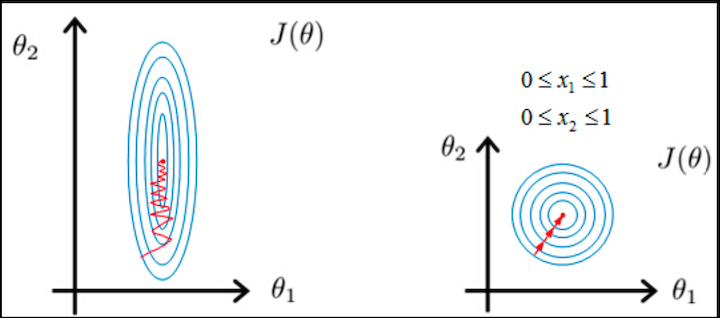

If you're not sure whether to scale your feature(s), then go ahead and scale them to be safe. Especially if the scale of a feature is very large or very small. I'm not aware of any case where scaling a feature made a model worse!